In [1]:
from src.project_utils import *
import src.segmentation_functions as sf
from src.background_classification import *
from src.classification import *
from src.region_growing import *
import pandas as pd
import matplotlib.pyplot as plt

test_path_ref = '/Users/louiscuendet/Documents/EPFL NEURO-X /Image Analysis and Pattern Recognition/dataset_project_iapr2025/test'
test_images, test_images_ref = load_images(test_path_ref)

df = pd.read_csv('/Users/louiscuendet/Documents/EPFL NEURO-X /Image Analysis and Pattern Recognition/iapr_group_50/project/final_format/sample_submission.csv')


In [2]:
labels = np.load('background_labels.npy')
clustered_images = [[] for _ in range(6)]
clustered_ref = [[] for _ in range(6)]
for image, image_ref, label in zip(test_images, test_images_ref, labels):
    clustered_images[label].append(image)
    clustered_ref[label].append(image_ref)

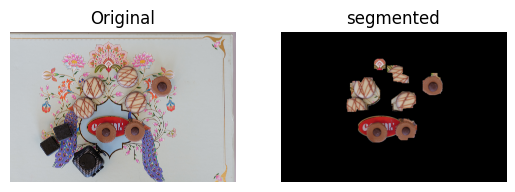

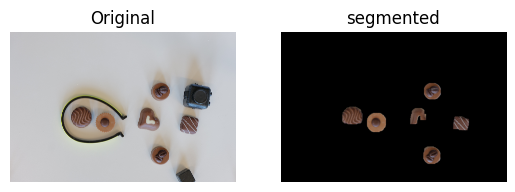

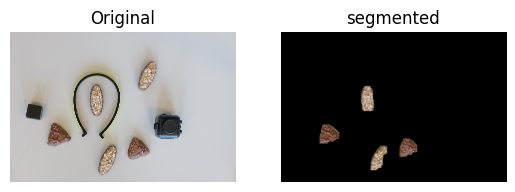

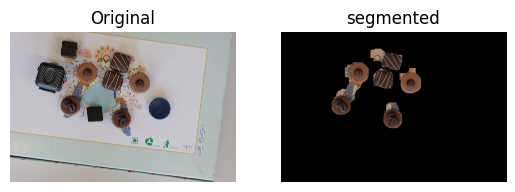

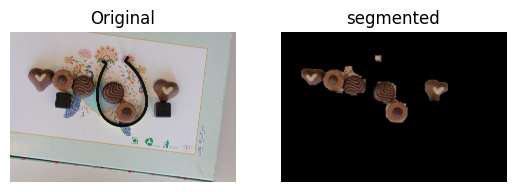

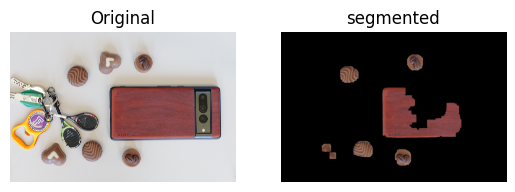

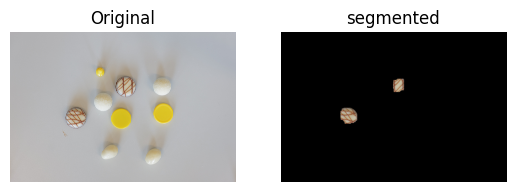

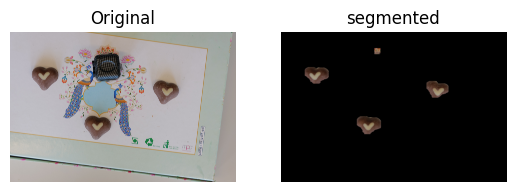

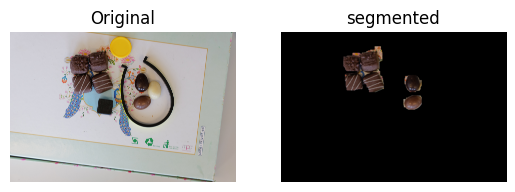

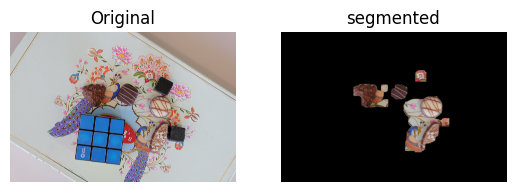

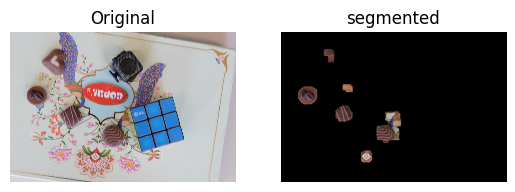

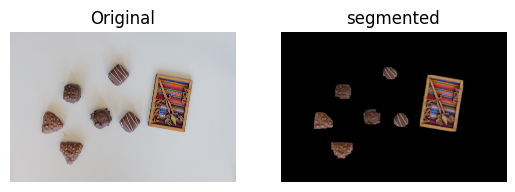

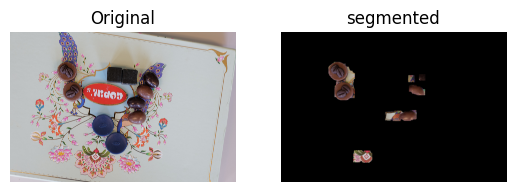

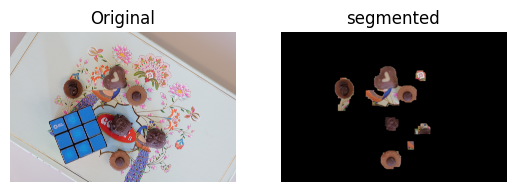

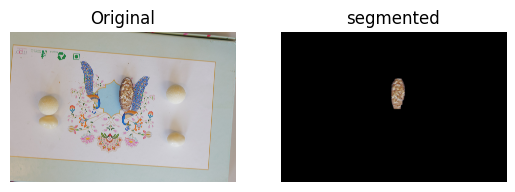

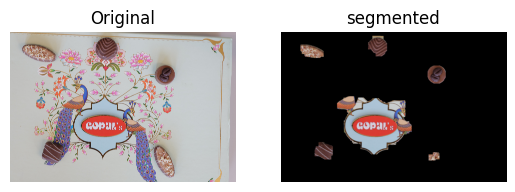

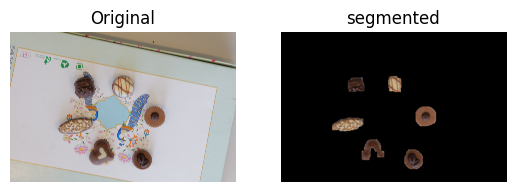

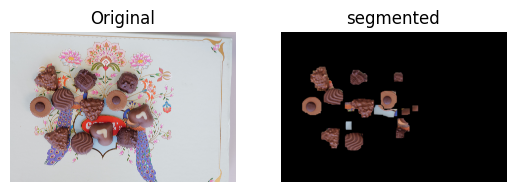

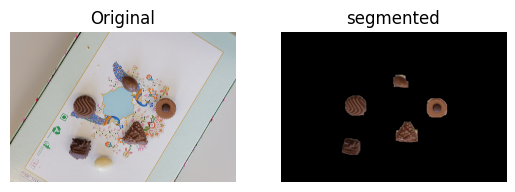

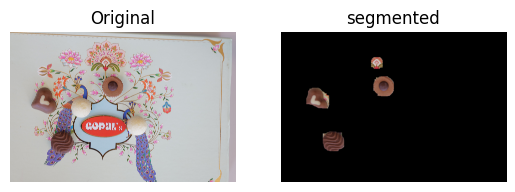

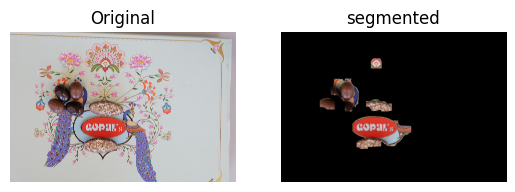

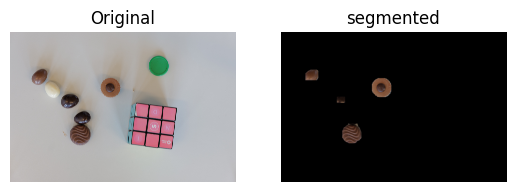

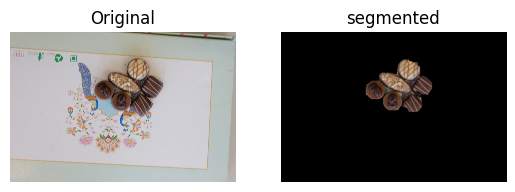

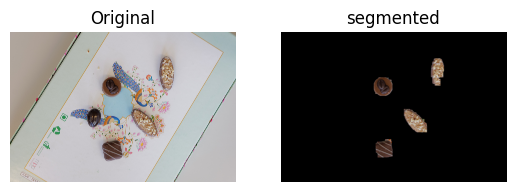

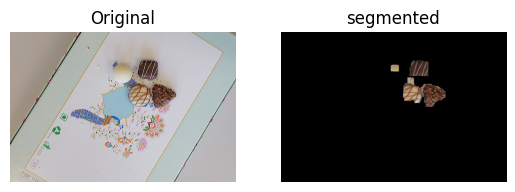

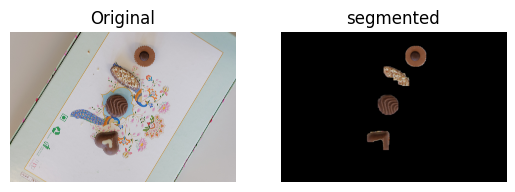

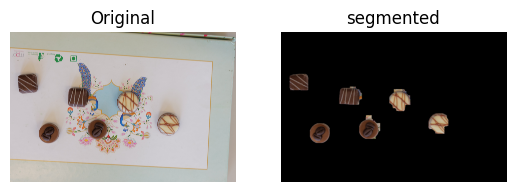

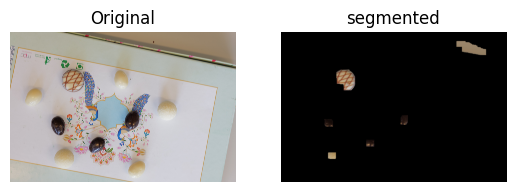

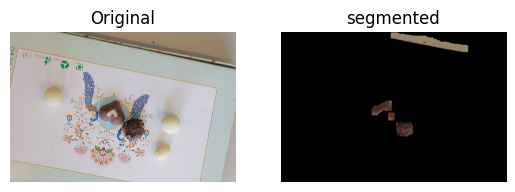

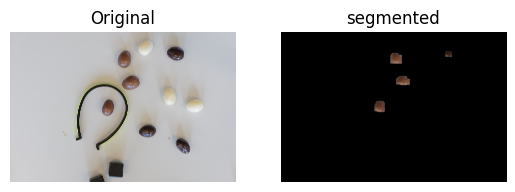

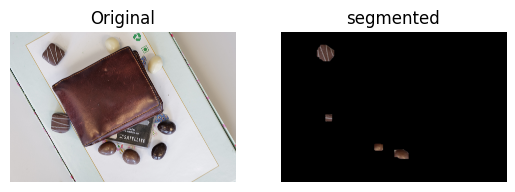

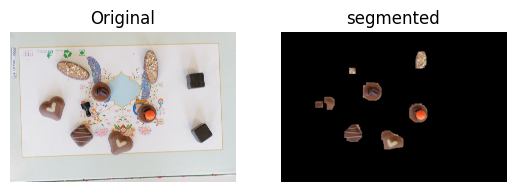

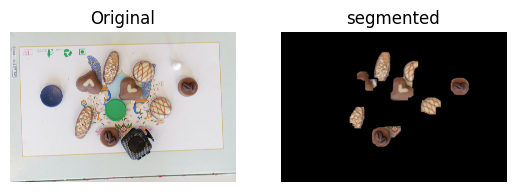

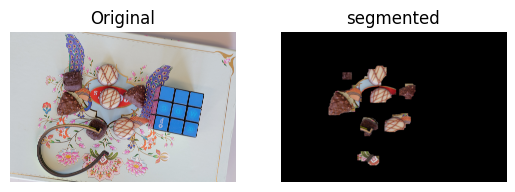

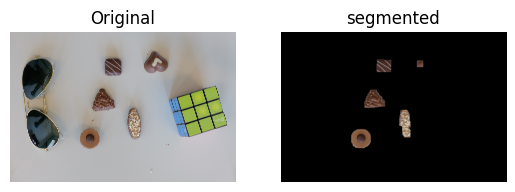

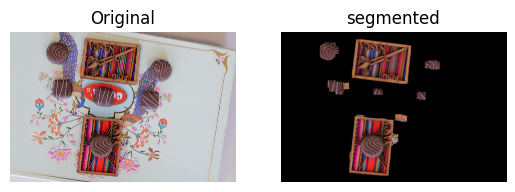

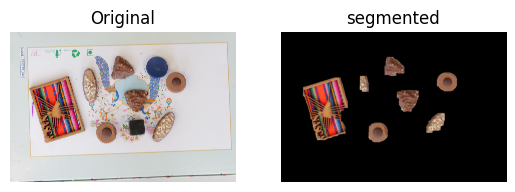

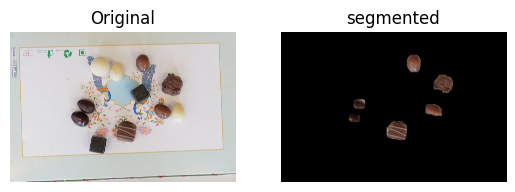

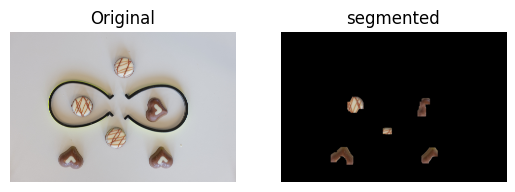

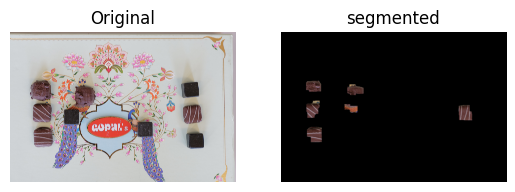

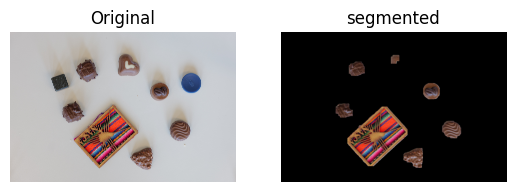

In [3]:
# for label in range(6):
#     for i,image in enumerate(clustered_images[label]):
#         if label == 1:
#             segmented_image = sf.segmentation_clean_background(image)
#         else:
#             segmented_image = sf.segmentation_weighted(image)

#         image_ref = int(clustered_ref[label][i])
#         row = classification(segmented_image)
#         row = np.insert(row,0,image_ref)
#         df.loc[df.id == image_ref,:] = row
#         show_comparison(image,segmented_image)

label = 3
for i,image in enumerate(clustered_images[label]):
    if label == 0:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
    elif label == 1:
        segmented_image = sf.segmentation_clean_background(image)
    elif label == 2:
        segmented_image = sf.segmentation_weighted(image, [1,1,0])
    elif label == 3:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
    elif label == 4:
        segmented_image = sf.segmentation_background_stylo(image)
    elif label == 5:
        segmented_image = sf.segmentation_weighted(image, [1,1,0.7])
    

    image_ref = int(clustered_ref[label][i])
    row = classification(segmented_image)
    row = np.insert(row,0,image_ref)
    df.loc[df.id == image_ref,:] = row
    show_comparison(image,segmented_image)

df.set_index('id').to_csv('submission_final.csv')
